In [1]:
import qiskit

Task 1

i. Input is |0+⟩.

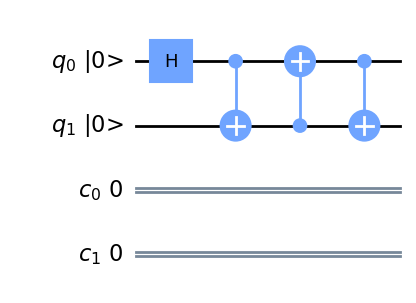

In [2]:
from qiskit import QuantumCircuit, Aer, assemble, transpile
from qiskit.visualization import array_to_latex, plot_histogram

# Create a circuit with 2 quantum registers and 2 classical bit registers
circ = QuantumCircuit(2, 2)

# Add Hadamard operation to q0
circ.h(0)

# Swap can be implemented with 3 CNOT gates           
circ.cx(0, 1)
circ.cx(1, 0)
circ.cx(0, 1)

# Draw the circuit
circ.draw(initial_state=True, cregbundle=False, output='mpl', style="clifford")

ii.

In [3]:
# Obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the circuit 
qobj = transpile(circ, simulator)

# Run the transpiled circuit on the simulator
output = simulator.run(qobj).result().get_statevector()

# Display the state vector 
print("Output:")
array_to_latex(output)

/var/folders/jm/jj3jlz1j63v1qh6z_xp8840h0000gn/T/ipykernel_62871/3054205029.py:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('statevector_simulator')


Output:


<IPython.core.display.Latex object>

iii.

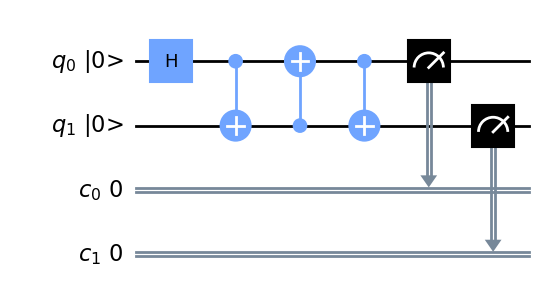

In [4]:
# q0 to be measured in c0 and q1 to be measured in c1
circ.measure([0, 1], [0, 1]) 

# Draw the circuit
circ.draw(initial_state = True, cregbundle = False, output = 'mpl', style = "clifford")

{'00': 41, '10': 59}


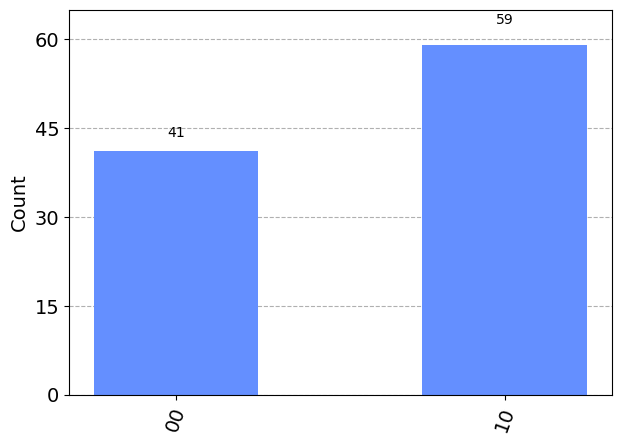

In [5]:
# Use the quantum simulator to run the circuit
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit
transpiled_circ = transpile(circ, simulator)

# Run the transpiled circuit on the simulator
result = simulator.run(transpiled_circ, shots = 100).result()
counts = result.get_counts(circ)

# Display the measurement results
print(counts)
plot_histogram(counts)

Task 2

i. Input is |+0⟩.

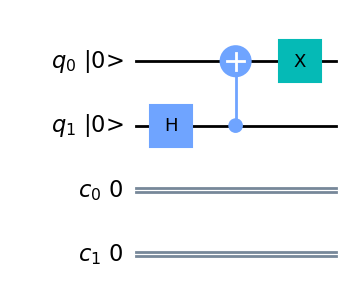

In [6]:
from qiskit import QuantumCircuit
from qiskit.tools.visualization import array_to_latex, plot_histogram

# Create a circuit with 2 quantum registers and 2 classical bit registers
circ = QuantumCircuit(2, 2)

# Add Hadamard operation to q1
circ.h(1)  
circ.cx(1,0)
circ.x(0)

# Draw the circuit
circ.draw(initial_state = True, cregbundle = False, output = 'mpl', style = "clifford")

ii.

In [7]:
# Obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

# Assemble the circuit
qobj = transpile(circ,simulator)

# Run the simulator to get the final state
final_state = simulator.run(qobj).result().get_statevector()

# Display the state vector
array_to_latex(final_state)

<IPython.core.display.Latex object>

iii. (According to the qiskit convention, in |q1q0⟩ the 2nd qubit here is q0. So q0 is the control bit)

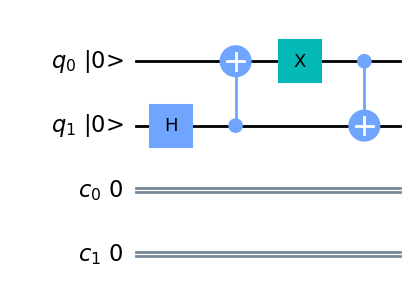

In [8]:
circ.cx(0,1)

# Draw the circuit
circ.draw(initial_state = True, cregbundle = False, output = 'mpl', style = "clifford")

In [9]:
# Assemble the circuit
new_qobj = transpile(circ,simulator)

# Run the simulator to get the final state
new_final_state = simulator.run(new_qobj).result().get_statevector()

# Display the state vector
array_to_latex(new_final_state)

<IPython.core.display.Latex object>

iv. The final state is not entangled it can be written as ∣ψ1⟩⊗∣ψ2⟩ with possible ∣ψ1⟩ = |1⟩ and 
∣ψ2⟩ = (1/√2)(|0⟩ + |1⟩).

v.

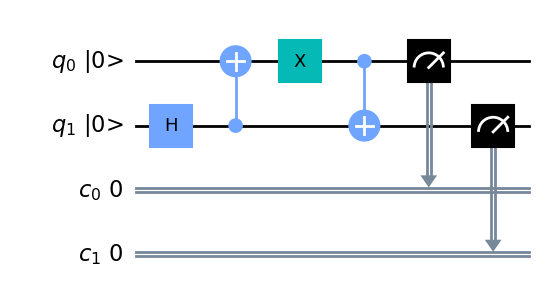

In [10]:
# q0 to be measured in c0 and q1 to be measured in c1
circ.measure([0, 1], [0, 1])

# Draw the circuit
circ.draw(initial_state = True, cregbundle = False, output = 'mpl', style = "clifford") 

{'10': 56, '11': 44}


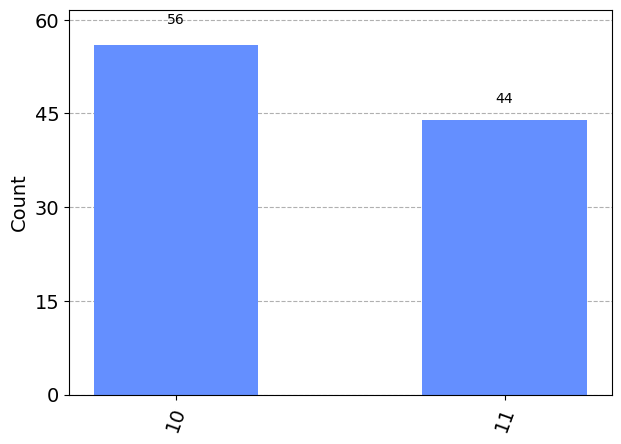

In [11]:
# Use the quantum simulator to run the circuit
new_simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit
t_circ = transpile(circ, new_simulator)

# Run the transpiled circuit on the simulator
result = simulator.run(t_circ, shots = 100).result()
counts = result.get_counts(circ)

# Display the measurement results
print(counts)
plot_histogram(counts)

Task 3

i. Input is |xyz⟩.

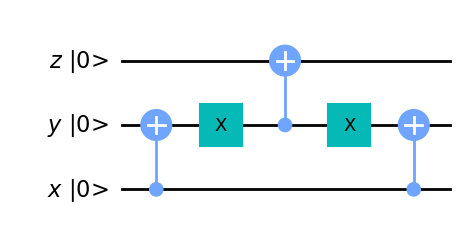

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, execute, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

z = QuantumRegister(1,'z')
y = QuantumRegister(1,'y')
x = QuantumRegister(1,'x')

# Create a circuit with triple quantum register 
circ = QuantumCircuit(z,y,x)
         
circ.cx(x[0], y[0])
circ.x(y[0])
circ.cx(y[0], z[0])
circ.x(y[0])
circ.cx(x[0], y[0])

# Draw the circuit
circ.draw(initial_state = True, cregbundle = False, output = 'mpl', style = "clifford")

ii.

In [13]:
backend = Aer.get_backend('unitary_simulator')

# Transpile the circuit for the backend
t_circ = transpile(circ, backend)

# Job execution and getting the result as an object
result = backend.run(t_circ).result()

# Get the unitary matrix from the result object
unitary_matrix = result.get_unitary(t_circ, decimals = 2)
print(unitary_matrix)

Operator([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))
